<a href="https://colab.research.google.com/github/mamasa1d/Project/blob/main/report_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Прибыльные платформы

In [ ]:
actual_platforms = data.query('year_of_release >= 2012')
actual_platforms_sales = (actual_platforms.groupby(['platform'],as_index = False)['sales_total'].sum()
                                 .sort_values('sales_total',ascending = False)
                           )
actual_platforms_sales

,platform,sales_total
4,PS4,314.14
3,PS3,288.79
9,X360,236.54
0,3DS,194.61
10,XOne,159.32
8,WiiU,82.19
2,PC,62.65
6,PSV,49.18
7,Wii,35.37
1,DS,12.55


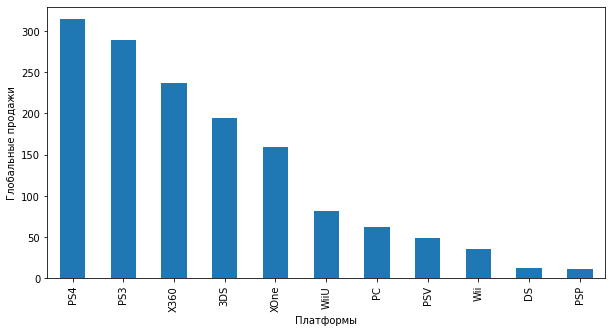

In [ ]:
(actual_platforms_sales.plot(kind='bar',x='platform', y='sales_total',figsize=(10, 5),legend=False)
                         .set(xlabel='Платформы', ylabel='Глобальные продажи')
)
plt.show()

In [ ]:
top_actual = actual_platforms_sales['platform'].tolist()
top_actual

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS', 'PSP']

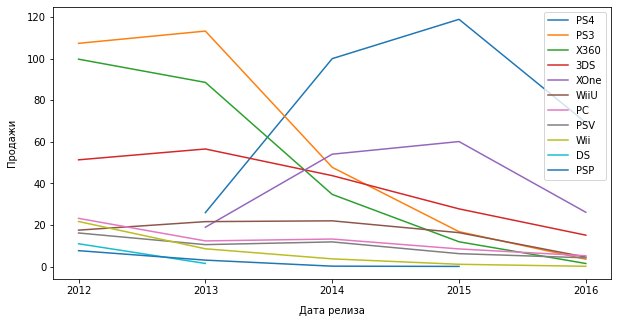

In [ ]:
for name in top_actual:
    actual_platforms.query('platform == @name').pivot_table(index = 'year_of_release',
                        values = 'sales_total', aggfunc = 'sum').sort_values('year_of_release',
                                                    ascending = False)['sales_total'].plot(figsize=(10, 5), label = name)
    
    plt.xticks(np.arange(2012, 2017, step=1))
    plt.xlabel('Дата релиза', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 10)
    plt.legend()

In [ ]:
sales_year_platform = (pd.pivot_table(actual_platforms , index='platform',
                                       columns='year_of_release', values='sales_total', aggfunc='sum').reset_index())
display(sales_year_platform)

year_of_release,platform,2012,2013,2014,2015,2016
0,3DS,51.36,56.57,43.76,27.78,15.14
1,DS,11.01,1.54,NaN,NaN,NaN
2,PC,23.22,12.38,13.28,8.52,5.25
3,PS3,107.36,113.25,47.76,16.82,3.60
4,PS4,NaN,25.99,100.00,118.90,69.25
5,PSP,7.69,3.14,0.24,0.12,NaN
6,PSV,16.19,10.59,11.90,6.25,4.25
7,Wii,21.71,8.59,3.75,1.14,0.18
8,WiiU,17.56,21.65,22.03,16.35,4.60
9,X360,99.74,88.58,34.74,11.96,1.52


Продажи падают на всех платформах, это связано с растущей популярностью мобильных игр.

Выводы: 

- Среди исследуемых нами платформ лидирующими по продажам в нашем временном промежутке были выявлены:
PS4, PS3, X360, 3DS, XOne.

- На конец 2016 года лидируют по продажам следующие платформы:
PS4;
Xone;
3DS.
Это топ-3. Потенциально прибыльных платформ.
- Исходя из данных, количество продаж игр, выпущенных на каждую из этих платформ, снижается. Таким образом, можно сказать, что весь рынок игр падает

#### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков. Посчитаем корреляцию между отзывами и продажами.

In [ ]:
ps4 = data.query("platform == 'PS4'")
xone = data.query("platform == 'XOne'")
ps4_f = ps4.query(f"{critic_score_mark and user_score_mark}")
features = ['user_score', 'critic_score', 'sales_total']

cmap=sns.diverging_palette(240, 10, as_cmap=True)
ps4_f[features].corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '12pt'})\
    .set_precision(2)

,user_score,critic_score,sales_total
user_score,1.00,0.39,-0.03
critic_score,0.39,1.00,0.35
sales_total,-0.03,0.35,1.00


In [ ]:
xone_f = xone.query(f"{critic_score_mark and user_score_mark}")
xone_f[features].corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '12pt'})\
    .set_precision(2)

,user_score,critic_score,sales_total
user_score,1.00,0.25,-0.07
critic_score,0.25,1.00,0.33
sales_total,-0.07,0.33,1.00


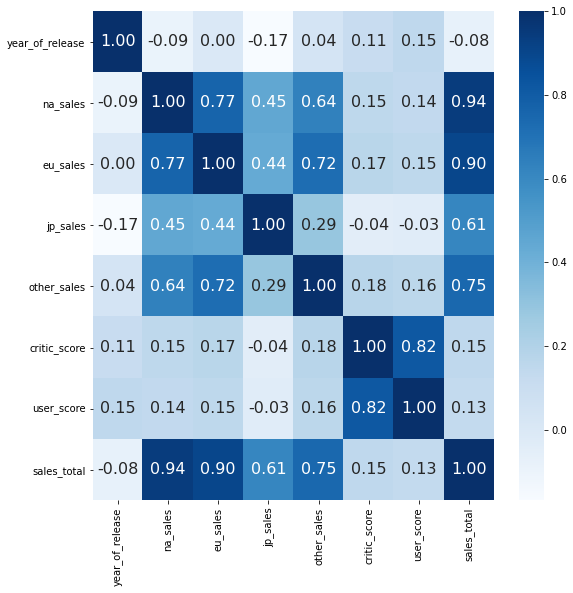

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(), annot=True, cmap="Blues", fmt='.2f', annot_kws={'size':16});

In [ ]:
games_ps3 = data[(data['platform'] == 'PS3') & (data['user_score'] > 0)].copy()

In [ ]:
data_ps3_filtered = games_ps3[['sales_total' ,'critic_score', 'user_score']]

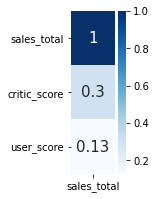

In [ ]:
plt.figure(figsize=(1,3))
sns.heatmap(data_ps3_filtered.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), cmap="Blues", 
            annot=True, annot_kws={'size':15});

Согласно корреляции сильнее всего на продажи влияет оценка критиков, оценка же пользователей почти не влияет

Взаимосвязи между отзывами пользователей и продажами нет.  
Взаимосвязь между отзывами критиков и продажами существует, но не слишком большая.
Корреляция не говорит о причинно-следственной связи.

Посмотрим корреляцию для других топовых платформ:

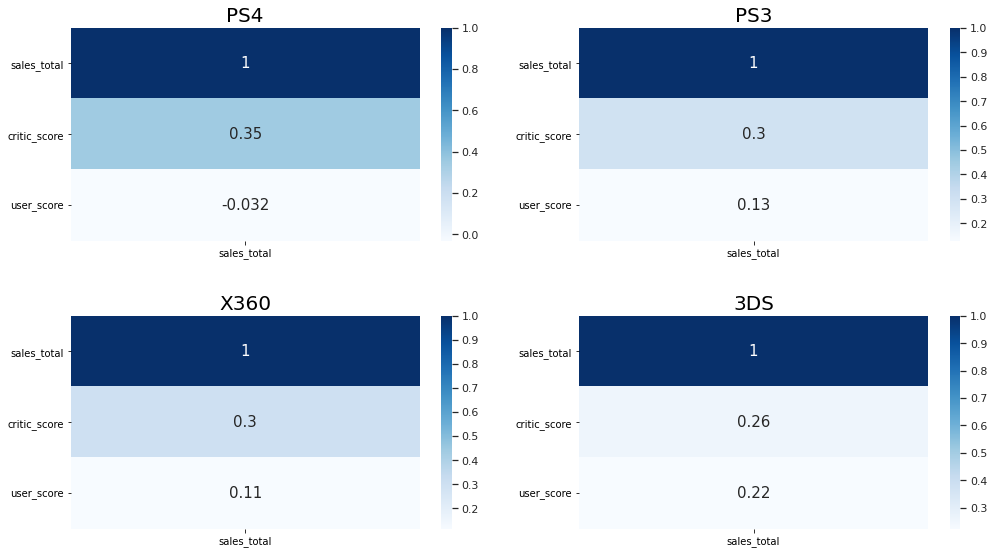

In [ ]:
top_platforms = ['PS4', 'PS3', 'X360', '3DS', 'XOne']

rows = len(top_platforms) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8.5))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = top_platforms[count]
        df_prep = data[(data['platform'] == curr_platform) & (data['user_score'] > 0)].copy()
        
        df_filtered = df_prep[['sales_total' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), 
                         cmap="Blues", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

Общий вывод:
  
    
- Данные по корреляции между выручкой и оценкой по платформам PS2, X360, PS3, PS и XOne более или менее совпадает с общими данными по датафрейму.
- Выделяются Wii и DS, по которым зависимость не такая большая.
- Есть так же платформы, где оценка критиков, согласно данных, сильнее "определяет" конечную выручку продукта, чем оценка пользователей. Это платформы DS, PS4 и Xone. В случае с DS полагаю, что дело в том, что приставка азиатская, большую популярность она имеет в Азии и соответственно, далеко не большая часть игроков принимает участие в оценке игр на эту платформу. 
- Про PS4 и Xone - платформы довольно новые, вполне вероятно, что пользователи пока не "освоились", поэтому большого количества отзывов, особенно качественных от них нет.

#### Выявим прибыльные жанры

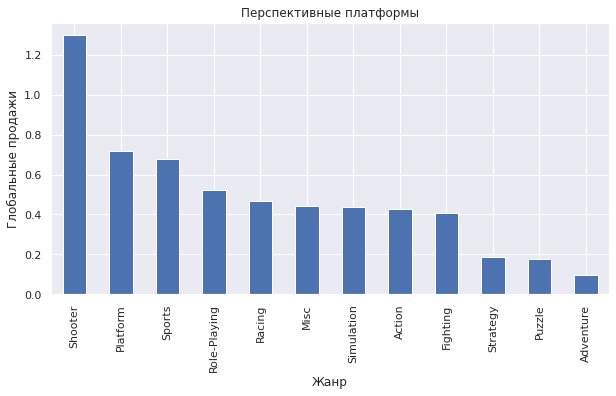

In [ ]:
(actual_platforms
    .pivot_table(index='genre', values='sales_total')
    .sort_values('sales_total', ascending=False)
    .plot(kind='bar', y='sales_total', figsize=(10, 5), legend=False,title = 'Перспективные платформы')
    .set(xlabel='Жанр', ylabel='Глобальные продажи'))

plt.show()

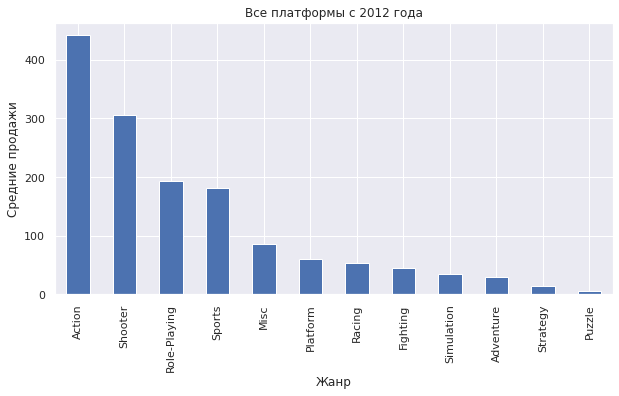

In [ ]:
(actual_platforms
    .pivot_table(index='genre', values='sales_total', aggfunc='sum')
    .sort_values('sales_total', ascending=False)
    .plot(kind='bar', y='sales_total', figsize=(10, 5), legend=False,title = 'Все платформы с 2012 года')
    .set(xlabel='Жанр', ylabel='Средние продажи'))

plt.show()

Вывод: При рассмотрении суммарных продаж лидерами были выявлены такие жанры как Action, Sports, Shooter, Role-Playing, Platform и Misc.
Больше всего игр жанра Action. За ними идут игры спортивного жанра. Причем даже учитывая то, что игр жанра "Спорт" заметно меньше на рынке (на треть от Action), выручка от продаж у них практически одинаковая. Это значит, что спортивные игры, в среднем, стоят дороже, чем шутеры. Ну и это ожидаемо, шутеры выходят преимущественно на PC, тогда как спортивные игры - на консолях.

Далее рассмотрим более подробно в разрезе регионов.

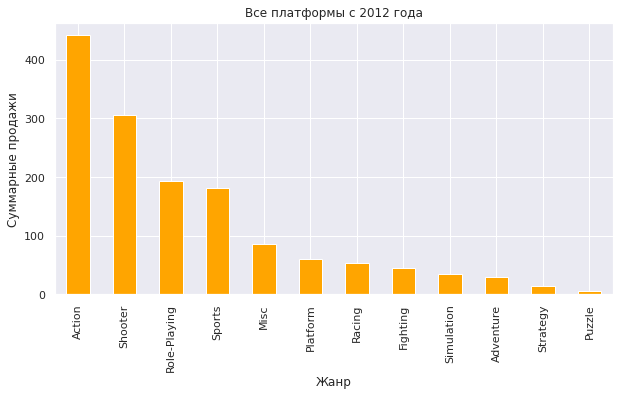

In [ ]:
(actual_platforms
    .pivot_table(index='genre', values='sales_total', aggfunc='sum')
    .sort_values('sales_total', ascending=False)
    .plot(kind='bar', y='sales_total', figsize=(10, 5), legend=False,title = 'Все платформы с 2012 года')
    .set(xlabel='Жанр', ylabel='Суммарные продажи'))

plt.show()

#### Топ 5 платформ:

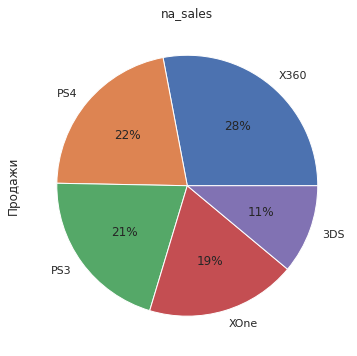

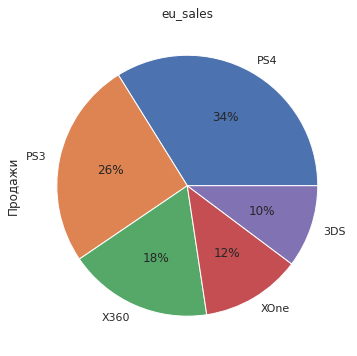

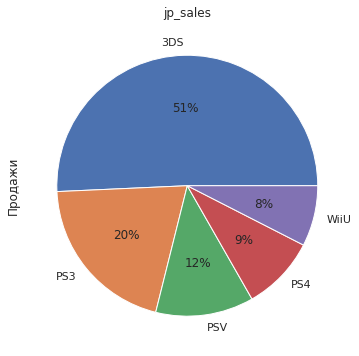

In [ ]:
for region in regions:
    (actual_platforms.pivot_table(index='platform', values=region, aggfunc='sum')
                .sort_values(region, ascending=False).head(5)
                .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(6, 6), legend=False, title = region)
                .set(ylabel='Продажи')
    )
    plt.show()

В Европе и Америке лидируют PS и Xbox.
В Японии с 50% рынка занимает их портативная консоль 3DS.

#### Топ 5 жанров:

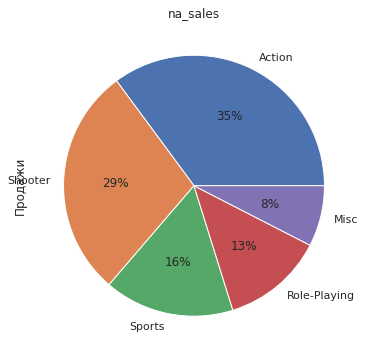

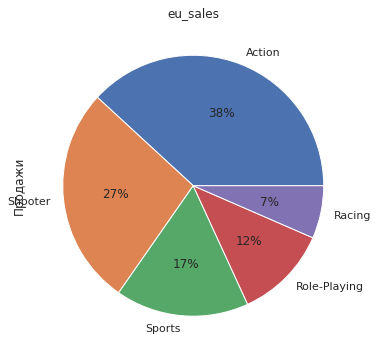

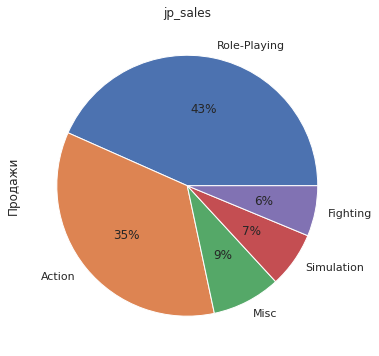

In [ ]:
for region in regions:
    (actual_platforms.pivot_table(index='genre', values=region, aggfunc='sum')
                .sort_values(region, ascending=False).head(5)
                .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(6, 6), legend=False, title = region)
                .set(ylabel='Продажи')
    )
    plt.show()

В Европе и Америке популярны жанры Action,Shooter и Sports.
Япония любит РПГ и Action.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

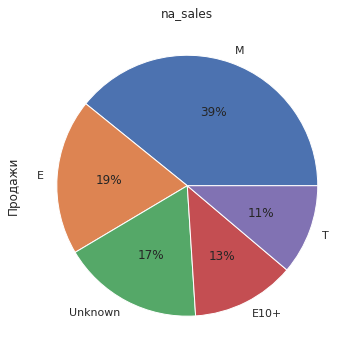

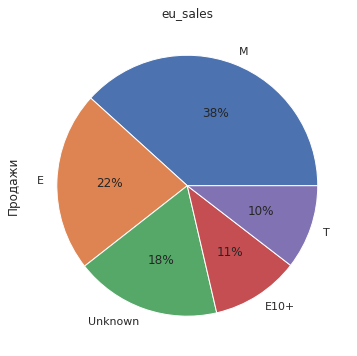

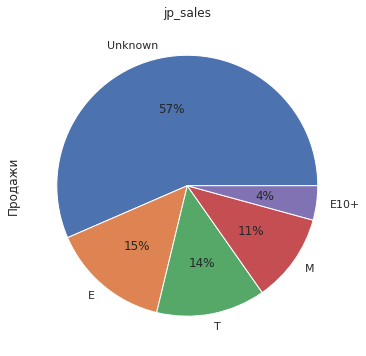

In [ ]:
for region in regions:
    (actual_platforms.pivot_table(index='rating', values=region, aggfunc='sum')
                .sort_values(region, ascending=False).head(5)
                .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(6, 6), legend=False, title = region)
                .set(ylabel='Продажи')
    )
    plt.show()

#### Вывод:
Портреты пользователей из Европы и Америки схожи.
Лидируют платформы PS и Xbox, жанры Action,Shooter и Sports, игры с рейтингом для взрослых и для всех.

У пользователей из Японии свои предпочтения.
Лидирует консоль 3DS, жанры РПГ и Action, игры с неизвестным рейтингом и рейтингом для всех.

### Общий вывод


 - По проведенному анализу: самое сильное влияние на итоговую выручку оказывают, в большинстве случаев, оценки критиков. Оценки пользователей такое влияние не оказывают.
 - Наиболее популярные и перспективные на данный момент платформы – это PS4, PS3, X360, 3DS, XOne.
 - В среднем одна игра выпущенная на платформе приносит прибыль около 300 тысяч долларов, но есть хиты как ГТА5 которые находятся в топе продаж на всех представленных платформах и суммарная прибыль приближается к 100 млн. долларов
 - В США и Европе лучше всего продаются экшены и шутеры.
 - Больше всего продаж приходится на игры с рейтингом для взрослых и для всех.
 - Япония – отдельный рынок с уклоном в портативные консоли и ролевые игры. Объём продаж в этой стране в 2.5 раза меньше показаталей Европы и Америки.
 - Потенциально выгодно разработать игру для рынка Европы и Америки на перспективных платформах Sony PlayStation 4 и Xbox One в жанре Shooter/Action. Японский рынок имеет свою специфику по платформам и жанрам, кроме того не слишком обширен.
 - Дополнительно стоит ещё раз отметить, что у нас отсутствуют данные по самому популярному сейчас сегменту игр - это MMORPG,MMOBA, Survival а также нет данных по играм на мобильниках. Оффлайн игры уходят в прошлое.
Онлайн игры распространяются по модели ФТП, либо месячной подписки и обычно имеют "донат", который приносит прибыль. Весьма вероятно по этой причине платформа PC не попадает в разряд перспективных, также может влиять фактор "пиратства".